**Goal is to work on a real world dataset and finding meaningful inferences.**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("apy.csv")

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.1+ MB


#Data Cleaning

In [7]:
df.Production.astype("float64")

ValueError: ignored

In [5]:
df=pd.read_csv("apy.csv",na_values="=")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242364 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [10]:
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3727
dtype: int64

there are approx 4k records with nan values at a column, we can either fill them with mean values or drop these records to do accurate statistical analysis.
i have decided to drop these records as the total records are 2.5 lakh

In [6]:
df.dropna(axis=0,inplace=True)

In [12]:
df.shape
#all the nan records are removed.

(242364, 7)

Now to check for data descripency. check if all the columns, unique strings are reasonable.

In [13]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [14]:
df.Crop_Year.unique()
#we need to sort the year

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [7]:
df.sort_values(by="Crop_Year",inplace=True)
df.Crop_Year.unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [16]:
df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [17]:
df.Crop.unique()

array(['Oilseeds total', 'Cashewnut', 'Banana', 'Arhar/Tur',
       'Small millets', 'Sesamum', 'Onion', 'Cotton(lint)', 'Horse-gram',
       'Bajra', 'Groundnut', 'Jowar', 'Maize', 'Dry chillies', 'Ragi',
       'Rice', 'Rapeseed &Mustard', 'Wheat', 'Castor seed', 'Garlic',
       'Pulses total', 'Sugarcane', 'Jute', 'Paddy', 'Gram', 'Barley',
       'Turmeric', 'Tapioca', 'Sweet potato', 'Potato', 'Niger seed',
       'Coconut ', 'Arecanut', 'Other  Rabi pulses', 'Linseed', 'Urad',
       'Total foodgrain', 'Moong(Green Gram)', 'Soyabean', 'Moth',
       'Other Kharif pulses', 'Tobacco', 'Sunflower',
       'Peas & beans (Pulses)', 'Masoor', 'Safflower', 'Sannhamp',
       'Mesta', 'Khesari', 'Dry ginger', 'Cardamom', 'Black pepper',
       'Korra', 'Samai', 'Coriander', 'Kapas', 'Varagu', 'Blackgram',
       'Other Cereals & Millets', 'other oilseeds', 'Guar seed', 'Tea',
       'Jute & mesta', 'Cond-spcs other', 'other misc. pulses', 'Rubber',
       'Coffee', 'Pome Fruit', 'Tomato

In [10]:
df["efficiency"]=df.Production/df.Area

#State wise analysis of efficiency over Rice Production.

In [11]:
df_States=df.groupby(["Crop_Year","State_Name","Crop"]).mean()
df_States.reset_index(inplace=True)
df_States

<ipython-input-11-1c6fdbce2537>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_States=df.groupby(["Crop_Year","State_Name","Crop"]).mean()


,Crop_Year,State_Name,Crop,Area,Production,efficiency
0,1997,Andhra Pradesh,Arhar/Tur,8787.500000,2193.750000,0.314775
1,1997,Andhra Pradesh,Bajra,5390.909091,4754.545455,1.048957
2,1997,Andhra Pradesh,Castor seed,2550.000000,350.000000,0.165625
3,1997,Andhra Pradesh,Cotton(lint),30675.000000,62916.666667,2.037271
4,1997,Andhra Pradesh,Dry chillies,3637.500000,8112.500000,1.891138
...,...,...,...,...,...,...
12891,2015,Sikkim,Rice,2667.250000,4921.750000,1.792298
12892,2015,Sikkim,Small millets,713.250000,727.750000,1.016917
12893,2015,Sikkim,Soyabean,819.500000,797.500000,0.949510
12894,2015,Sikkim,Urad,968.000000,894.000000,0.939103


In [21]:
df.State_Name.unique()

array(['Uttar Pradesh', 'Tamil Nadu', 'Madhya Pradesh', 'West Bengal',
       'Gujarat', 'Assam', 'Maharashtra', 'Rajasthan', 'Goa',
       'Andhra Pradesh', 'Telangana ', 'Karnataka', 'Arunachal Pradesh',
       'Manipur', 'Meghalaya', 'Bihar', 'Haryana', 'Jammu and Kashmir ',
       'Odisha', 'Kerala', 'Punjab', 'Mizoram', 'Nagaland', 'Tripura',
       'Chandigarh', 'Himachal Pradesh', 'Dadra and Nagar Haveli',
       'Sikkim', 'Puducherry', 'Uttarakhand', 'Chhattisgarh',
       'Andaman and Nicobar Islands', 'Jharkhand'], dtype=object)

Text(0.5, 1.0, 'production of rice ove the years for each state')

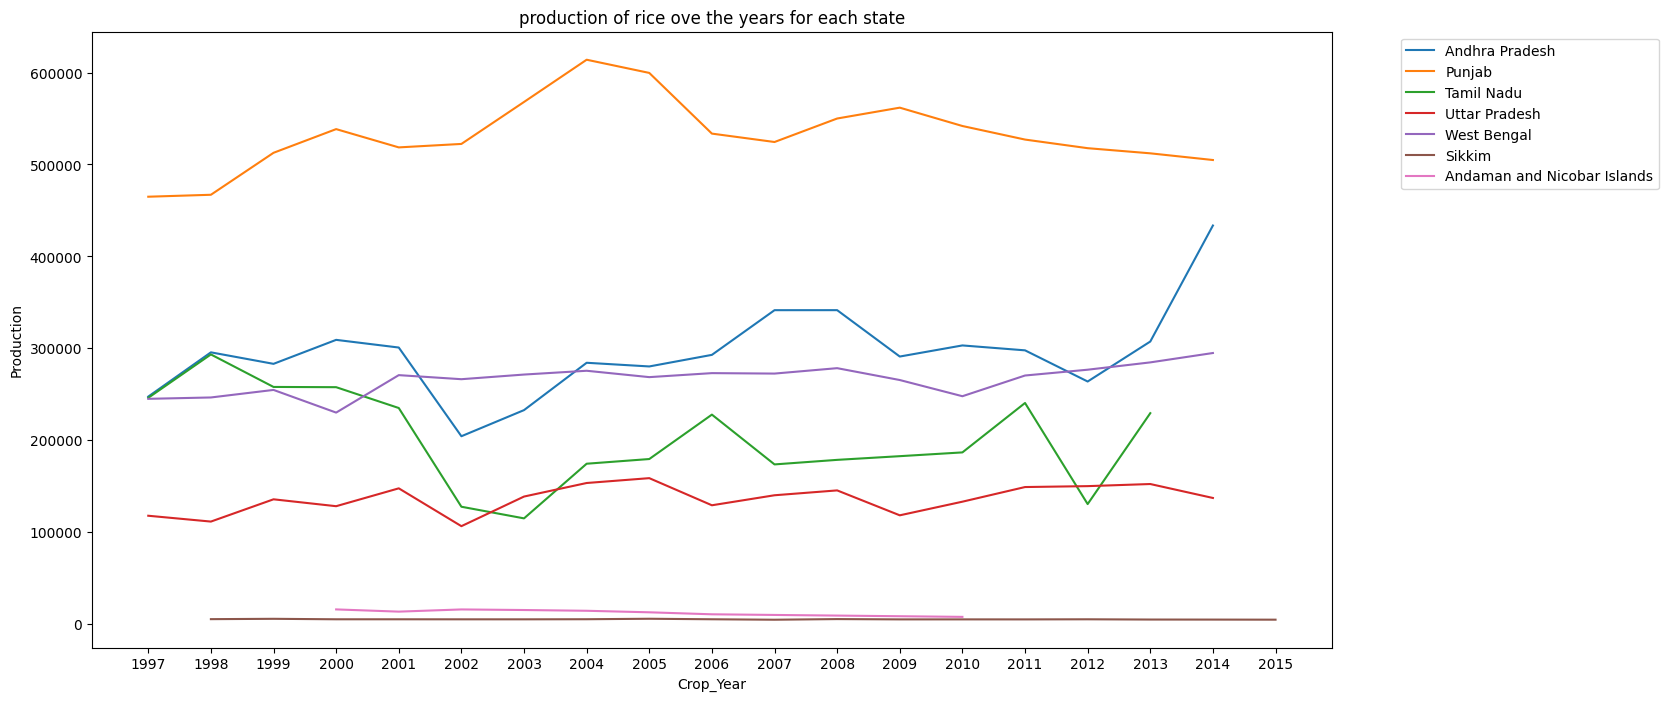

In [22]:
fig=plt.gcf()
fig.set_size_inches(16,8)
sns.lineplot(x="Crop_Year",y="Production",data=df_States[(df_States.Crop=="Rice") &(df_States.State_Name.isin(['Andaman and Nicobar Islands','Punjab',"Sikkim","Tamil Nadu",'Uttar Pradesh','West Bengal','Andhra Pradesh']))],hue="State_Name")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(range(1997,2016))
plt.title("production of rice ove the years for each state")

We can clearly observe that Punjab is leading in rice productin over the above states in the plot. also , most of the states production seems to fluctuate over the years and not maintaining a steady increase trend.the straight lines formed by andaman and nicobar and sikkim might be due to missing data between the years.

Text(0.5, 1.0, 'Efficiency of rice ove the years for each state')

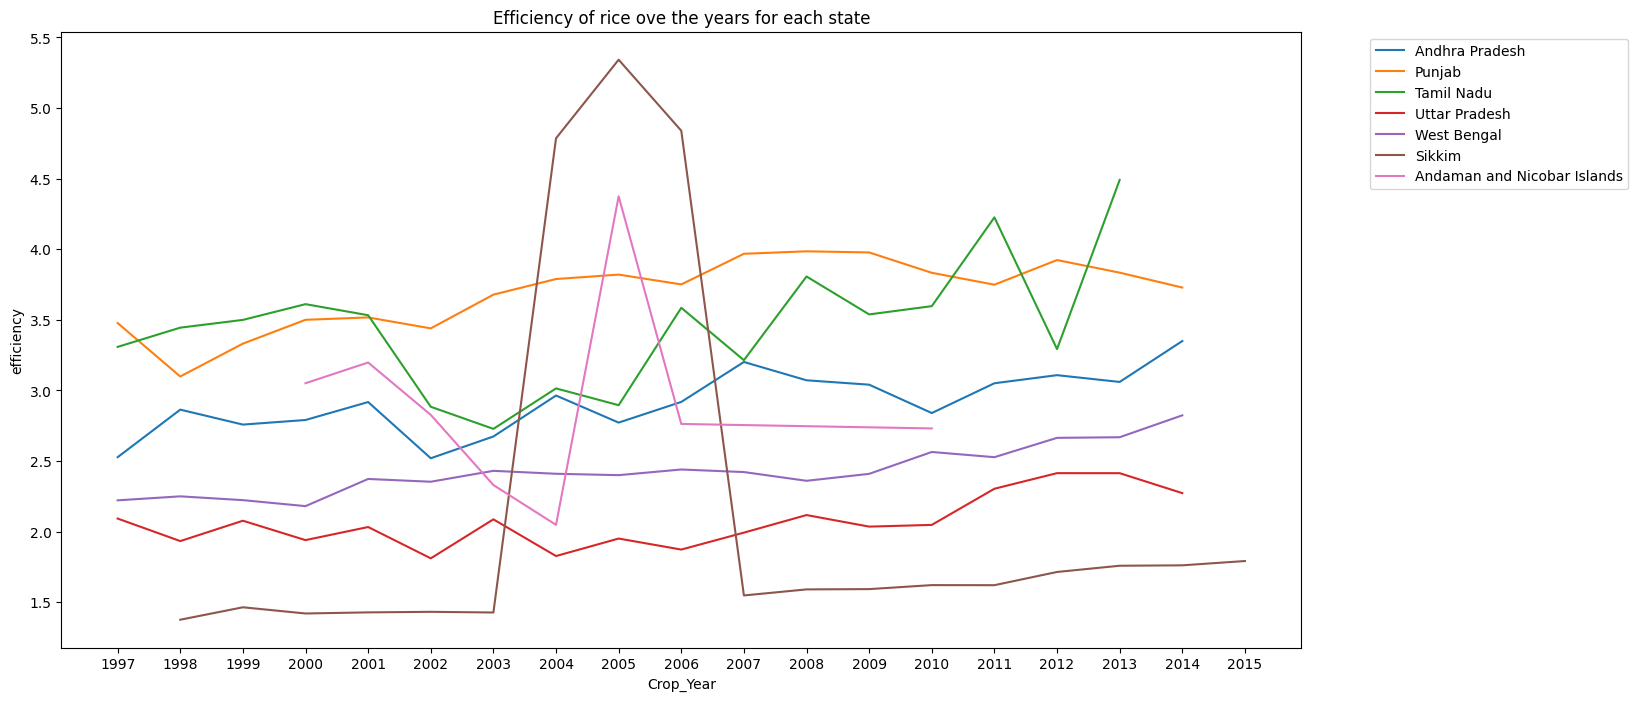

In [23]:
fig=plt.gcf()
fig.set_size_inches(16,8)
sns.lineplot(x="Crop_Year",y="efficiency",data=df_States[(df_States.Crop=="Rice") &(df_States.State_Name.isin(['Andaman and Nicobar Islands','Punjab',"Sikkim","Tamil Nadu",'Uttar Pradesh','West Bengal','Andhra Pradesh']))],hue="State_Name")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(range(1997,2016))
plt.title("Efficiency of rice ove the years for each state")

It is observed that with each year progressing , the efficiency of rice production of the above states is gradually increasing although not uniform and substantial.also ,the spark increase in Sikkim efficiency in the graph might be due to outliers or incorrect data.

In [24]:
!pip3 install plotly_express

In [25]:
import plotly_express as px

In [30]:
px.scatter(df_States[df_States.Crop=="Rice"],x="Area",y="efficiency",animation_frame="Crop_Year",animation_group="State_Name",color="State_Name",range_y=[0, 10])


We can clearly observe that efficiency in crop production does not relate to area of the land.there are many data points that states highest efficiency over lowest area as well as highest area. we can observe that the efficiency of all levels can be observed in entire area scale in the plot.

In [33]:
px.scatter(df_States[df_States.Crop=="Rice"],x="Area",y="Production",animation_frame="Crop_Year",animation_group="State_Name",color="State_Name")


Above plot clearly depicts that  there is a linear relation between the production of rice and  the area of crop production.  
with increase in crop area the production of rice is likely to be inproved.  
Only noticible outlier in the graph is seen in Odisha case. as from 2011 to 2012 its production got increased very little but its area of production increased a lot due to which its efficiency got drastically decreased and became as an outlier in the above graph.